In [54]:
%matplotlib inline

# Standard imports
import os
import sys

# Data science imports
import pandas
import matplotlib.pyplot as plt

In [13]:
# Setup path
sys.path.append("../")
sys.path.append("../contraxsuite_services/")

In [15]:
# Django imports
import django
from django.db import IntegrityError

# Setup django environment
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "config.settings.local")
django.setup()

In [16]:
# Import document model
from contraxsuite_services.apps.document import *

## Iterating through documents and text units

Let's start by learning to iterate through documents. 

The code below demonstrates how to iterate through the first 10 `Document` objects in the system.

In [18]:
# Iterate and print
for d in Document.objects.all()[0:10]:
    print(d)

Document (type=software_license, name=1000297_1999-03-16_SOFTWARE LICENSE AGREEMENT.txt)
Document (type=software_license, name=1000495_2003-03-26_AMENDMENT TO OEM-IN SOFTWARE LICENSE AGREEMENT.txt)
Document (type=service, name=1001082_2003-05-06_EX-10.1 SATELLITE SERVICE AGREEMENT.txt)
Document (type=service, name=1001082_2003-11-10_EX-10.2 SATELLITE SERVICE AGREEMENT.txt)
Document (type=service, name=1001082_2004-05-06_AMENDMENT NO. 1 TO SATELLITE SERVICE AGREEMENT.txt)
Document (type=service, name=1001082_2004-05-06_AMENDMENT NO. 3 TO SATELLITE SERVICE AGREEMENT.txt)
Document (type=service, name=1001082_2004-05-06_SATELLITE SERVICE AGREEMENT.txt)
Document (type=service, name=1001082_2004-05-06_WHOLE RF CHANNEL SERVICE AGREEMENT.txt)
Document (type=service, name=1001082_2004-08-09_AMENDMENT NO. 2 TO SATELLITE SERVICE AGREEMENT.txt)
Document (type=service, name=1001082_2004-08-09_SECOND AMENDMENT TO WHOLE RF CHANNEL SERVICE AGREEMENT.txt)


### Examining text inside of documents
The code below next demonstrates how to print the first three paragraphs of the first documents.

In [28]:
# Iterate through documents
for d in Document.objects.all()[0:3]:
    # Output document header
    print(d)
    
    # Iterate through first three paragraphs
    for tu in d.textunit_set.filter(unit_type="paragraph").order_by("id").all()[0:5]:
        print(tu.text[0:min(80, len(tu.text))] + "...")
    
    # Pretty-printing
    print("="*32)

Document (type=software_license, name=1000297_1999-03-16_SOFTWARE LICENSE AGREEMENT.txt)
<PAGE>   1 EXHIBIT 10.28...
US/INTELICOM INC. SOFTWARE LICENSE AGREEMENT...
THIS AGREEMENT, made and entered into as of the seventh day of April, 1998, by a...
RECITALS:  A. US/INTELICOM is engaged in developing and licensing application so...
B. US/INTELICOM has the exclusive right, title and interest in and to said appli...
Document (type=software_license, name=1000495_2003-03-26_AMENDMENT TO OEM-IN SOFTWARE LICENSE AGREEMENT.txt)
Amendment No. 1 To OEM-IN Software License Agreement...
This Amendment is the First Amendment ("Amendment No. 1") to the OEM-IN Software...
Whereas, the Parties desire to amend Exhibit A, Software and Royalties, and Exhi...
Now therefore, the Parties agree as follows:  1. Exhibit A and Exhibit G, attach...
IN WITNESS WHEREOF, the parties have executed this Amendment No. 1, as of the da...
Document (type=service, name=1001082_2003-05-06_EX-10.1 SATELLITE SERVICE AGREEMEN

### Adding document properties

The code below next demonstrates how to add a key-value property to a Document object.

In [32]:
# Get target document
d = Document.objects.first()
my_property = DocumentProperty()
my_property.document = d
my_property.key = "key"
my_property.value = "value"
my_property.save()

In [41]:
# Iterate through all "key" properties
for p in DocumentProperty.objects.filter(key="key").all():
    print(p)

DocumentProperty (document=Document (type=software_license, name=1000297_1999-03-16_SOFTWARE LICENSE AGREEMENT.txt), key=key, value=value


## Using ThingUsage objects

The code below demonstrates a number of ThingUsage patterns,
including DateUsage, EntityUsage, and PartyUsage.

In [46]:
# Iterate through first 10 DateDuration usages
for ddu in DateDurationUsage.objects.all()[0:10]:
    # Output summary
    print(ddu.text_unit.document.name + ": " + ddu.text_unit.text[0:min(80, len(tu.text))] + "..." + ddu.duration_str)

1000297_1999-03-16_SOFTWARE LICENSE AGREEMENT.txt: Licensee agrees to remit to...3 days
1000297_1999-03-16_SOFTWARE LICENSE AGREEMENT.txt: (d)      Any notice or othe...4 days
1000297_1999-03-16_SOFTWARE LICENSE AGREEMENT.txt: herein within fifteen (15) ...15 days
1000297_1999-03-16_SOFTWARE LICENSE AGREEMENT.txt: If the performance of all o...30 days
1000297_1999-03-16_SOFTWARE LICENSE AGREEMENT.txt: (ii)     the breach by Lice...30 days
1000297_1999-03-16_SOFTWARE LICENSE AGREEMENT.txt: Following the initial term,...60 days
1000297_1999-03-16_SOFTWARE LICENSE AGREEMENT.txt: The term of this license sh...90 days
1000297_1999-03-16_SOFTWARE LICENSE AGREEMENT.txt: This monthly maintenance an...6 months
1000297_1999-03-16_SOFTWARE LICENSE AGREEMENT.txt: (5,000) Phones containing t...12 months
1000297_1999-03-16_SOFTWARE LICENSE AGREEMENT.txt: (c)      In addition, US/IN...12 months


In [49]:
# Iterate through first 10 Date usages
for du in DateUsage.objects.all()[0:10]:
    # Output summary
    print(du.text_unit.document.name + ": " + du.text_unit.text[0:min(80, len(tu.text))] + "..." + str(du.date))

1000297_1999-03-16_SOFTWARE LICENSE AGREEMENT.txt: 4-7-98 Date                ...1998-04-07
1000297_1999-03-16_SOFTWARE LICENSE AGREEMENT.txt: This monthly maintenance an...1998-09-01
1000297_1999-03-16_SOFTWARE LICENSE AGREEMENT.txt: This monthly maintenance an...1999-09-30
1000297_1999-03-16_SOFTWARE LICENSE AGREEMENT.txt: 4-7-98 Date                ...1998-04-07
1000297_1999-03-16_SOFTWARE LICENSE AGREEMENT.txt: The arrangement will then a...1998-09-01
1000297_1999-03-16_SOFTWARE LICENSE AGREEMENT.txt: Unless Licensee elects to c...1999-09-30
1000495_2003-03-26_AMENDMENT TO OEM-IN SOFTWARE LICENSE AGREEMENT.txt: This Amendment is the First...2002-12-03
1000495_2003-03-26_AMENDMENT TO OEM-IN SOFTWARE LICENSE AGREEMENT.txt: "Agreement" means that OEM ...2002-12-03
1000495_2003-03-26_AMENDMENT TO OEM-IN SOFTWARE LICENSE AGREEMENT.txt: "Agreement" means that OEM ...2002-12-03
1000495_2003-03-26_AMENDMENT TO OEM-IN SOFTWARE LICENSE AGREEMENT.txt: 1") to the OEM-IN Software ...2002-12-03


In [51]:
# Iterate through first 10 Date usages
for pu in PartyUsage.objects.all()[0:10]:
    # Output summary
    print(pu.text_unit.document.name + ": " + pu.text_unit.text[0:min(60, len(tu.text))] + "..." + pu.party.name)

1000297_1999-03-16_SOFTWARE LICENSE AGREEMENT.txt: THIS AGREEMENT, made and en...QUINTEL CELLULAR, LLC
1000297_1999-03-16_SOFTWARE LICENSE AGREEMENT.txt: THIS AGREEMENT, made and en...US/INTELICOM, INC
1000297_1999-03-16_SOFTWARE LICENSE AGREEMENT.txt: THIS AGREEMENT, made and en...QUINTEL CELLULAR, LLC
1000297_1999-03-16_SOFTWARE LICENSE AGREEMENT.txt: THIS AGREEMENT, made and en...US/INTELICOM, INC
1000495_2003-03-26_AMENDMENT TO OEM-IN SOFTWARE LICENSE AGREEMENT.txt: 4. For legal notices under ...CISCO SYSTEMS, INC
1000495_2003-03-26_AMENDMENT TO OEM-IN SOFTWARE LICENSE AGREEMENT.txt: Agreed:                    ...VISUAL NETWORKS OPERATIONS, INC
1000495_2003-03-26_AMENDMENT TO OEM-IN SOFTWARE LICENSE AGREEMENT.txt: 1") to the OEM-IN Software ...CISCO SYSTEMS, INC
1000495_2003-03-26_AMENDMENT TO OEM-IN SOFTWARE LICENSE AGREEMENT.txt: For legal notices under thi...CISCO SYSTEMS, INC
1000495_2003-03-26_AMENDMENT TO OEM-IN SOFTWARE LICENSE AGREEMENT.txt: 1") to the OEM-IN Software ...NE

## Working with Pandas and Matplotlib

Let's try a more exciting example by plotting the distribution of dates.

In [55]:
# Iterate through first 10 Date usages
year_list = [du.date.year for du in DateUsage.objects.all()[0:100]]
year_counts = pandas.Series(year_list).value_counts()
year_counts

2004    42
2003    28
2005    14
2008     4
2002     4
1998     4
2006     2
1999     2
dtype: int64

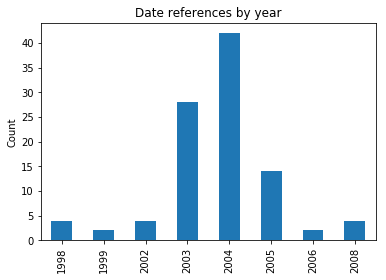

In [63]:
# Plot the distribution
ax = year_counts.sort_index().plot(kind="bar")
_ = ax.set_title("Date references by year")
_ = ax.set_ylabel("Count")